**SUNEHA SEN(MDS202351)**

In [ ]:
!ls

In [ ]:
!pip install mlflow

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import utils

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Load Data

In [4]:
df = pd.read_csv('/content/raw_data', sep='\t', names=['label', 'text'])
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
# Display nulls, nan, duplicates
print('Nulls:', df.isnull().sum())
print('Nans:', df.isna().sum())
print('Duplicates:', df.duplicated().sum())

Nulls: label    0
text     0
dtype: int64
Nans: label    0
text     0
dtype: int64
Duplicates: 403


In [7]:
# Remove duplicates
df = df.drop_duplicates(keep='first')
print('Duplicates:', df.duplicated().sum())

Duplicates: 0


### EDA

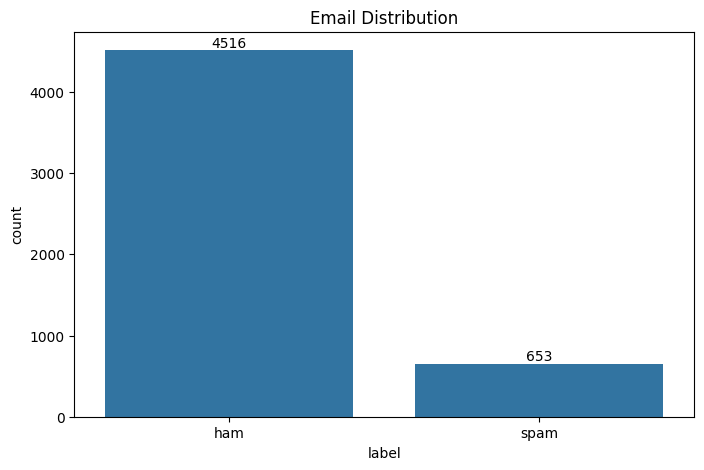

In [8]:
# Display the distribution of the labels
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
utils.plot_distribution(df['label'], ax)
plt.title('Email Distribution')
plt.show()

### Processing Texts

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
# Display the processed text
df = utils.process_text(df)
df.head(5)

,label,processed_text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah nt think goe usf live around though


### Split into Train, Test and Validation

In [11]:
X_train, X_test, X_val, y_train, y_test, y_val = utils.split_train_test_valid(
    df=df,
    test_size=0.2,
    random_state=1
)

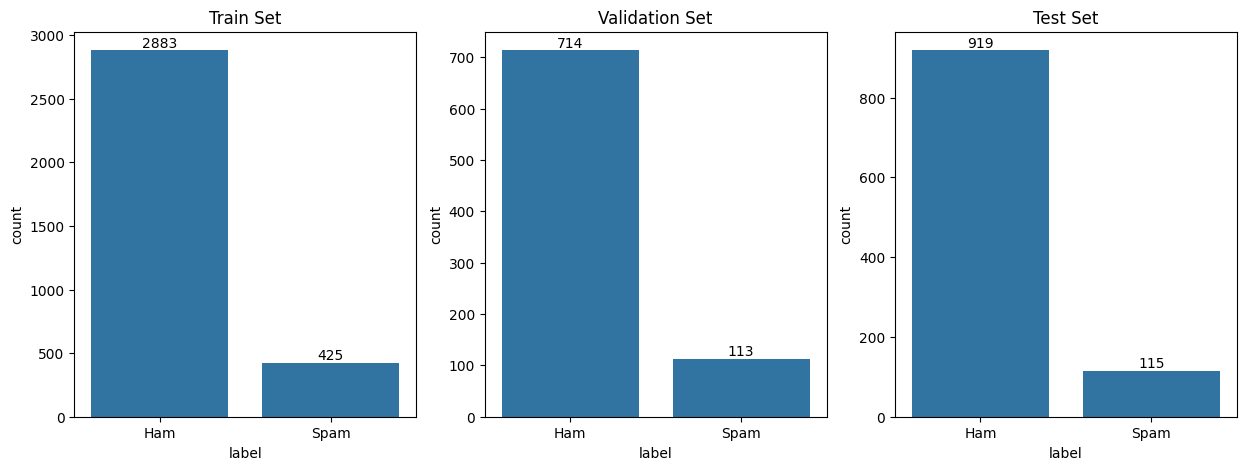

In [12]:
# Plot the distribution of the labels in train, validation, and test sets
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, data in enumerate([(y_train, 'Train Set'), (y_val, 'Validation Set'), (y_test, 'Test Set')]):
    utils.plot_distribution(data[0], ax[i])
    ax[i].set_xticklabels(['Ham', 'Spam'])
    ax[i].set_title(data[1])

plt.show()

### Save train, test and validation

In [13]:
pd.concat([X_train, y_train], axis=1).to_csv('/content/train.csv', index=False)
pd.concat([X_test, y_test], axis=1).to_csv('/content/test.csv', index=False)
pd.concat([X_val, y_val], axis=1).to_csv('/content/val.csv', index=False)

### Implement DVC for version control

In [ ]:
!pip install dvc
!pip install dvc[gdrive]

In [15]:
!rm -rf .dvc

In [16]:
! git init
! dvc init

Reinitialized existing Git repository in /content/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [17]:
!git config --global user.name "Suneha"
!git config --global user.email "suneha847@gmail.com"

In [18]:
!ls -l /content

total 760
-rw-r--r-- 1 root root   2408 Mar  3 19:23 abiding-rhythm-452619-i1-de7f9f53f283.json
drwxr-xr-x 2 root root   4096 Mar  3 19:10 data
-rw-r--r-- 1 root root    102 Mar  3 19:35 data.dvc
drwxr-xr-x 2 root root   4096 Mar  3 16:59 __pycache__
-rw-r--r-- 1 root root 477907 Mar  3 17:02 raw_data
drwxr-xr-x 1 root root   4096 Feb 27 14:22 sample_data
-rw-r--r-- 1 root root  51444 Mar  3 20:02 test.csv
-rw-r--r-- 1 root root 171476 Mar  3 20:02 train.csv
-rw-r--r-- 1 root root   5578 Mar  3 16:58 utils.py
-rw-r--r-- 1 root root  42558 Mar  3 20:02 val.csv


In [19]:
!mkdir data
!mv train.csv test.csv val.csv spam.csv data/

!ls -l data

mkdir: cannot create directory ‘data’: File exists
mv: cannot stat 'spam.csv': No such file or directory
total 756
-rw-r--r-- 1 root root 503663 Mar  3 17:01 spam.csv
-rw-r--r-- 1 root root  51444 Mar  3 20:02 test.csv
-rw-r--r-- 1 root root 171476 Mar  3 20:02 train.csv
-rw-r--r-- 1 root root  42558 Mar  3 20:02 val.csv


In [20]:
! dvc add data
! git add data.dvc .gitignore
! git commit -m "track data"

⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Adding data to cache:   0% 0/4 [00:00<?, ?file/s]
Adding data to cache:   0% 0/4 [00:00<?, ?file/s{'info': ''}]
                                                             
!
Checking out /content/data          |0.00 [00:00,    ?files/s]
Adding...: 100% 1/1 [00:00<00:00, 20.47file/s{'info': ''}]

To track the changes with git, run:

	git add data.dvc

To enable auto staging, run:

	dvc config core.autostage true
On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	__pycache__/
	abiding-rhythm-452619-i1-de7f9f53f283.json
	raw_data
	sample_data/
	utils.py

nothing added to commit but untracked files present (use "git add" to track)


In [21]:
!dvc remote add -df storage gdrive://1OohZ2dyA6j6wfwXzfTdITrzVM96-x7ha
!dvc remote modify storage gdrive_use_service_account true
!dvc remote modify storage gdrive_service_account_json_file_path /content/abiding-rhythm-452619-i1-de7f9f53f283.json

Setting 'storage' as a default remote.


In [22]:
! dvc push


Pushing
Querying remote cache:   0% 0/1 [00:00<?, ?files/s]
Querying remote cache:   0% 0/1 [00:00<?, ?files/s{'info': ''}]
Querying remote cache: 100% 1/1 [00:01<00:00,  1.36s/files{'info': ''}]
Pushing
Everything is up to date.


### Split Again with a Different Seed

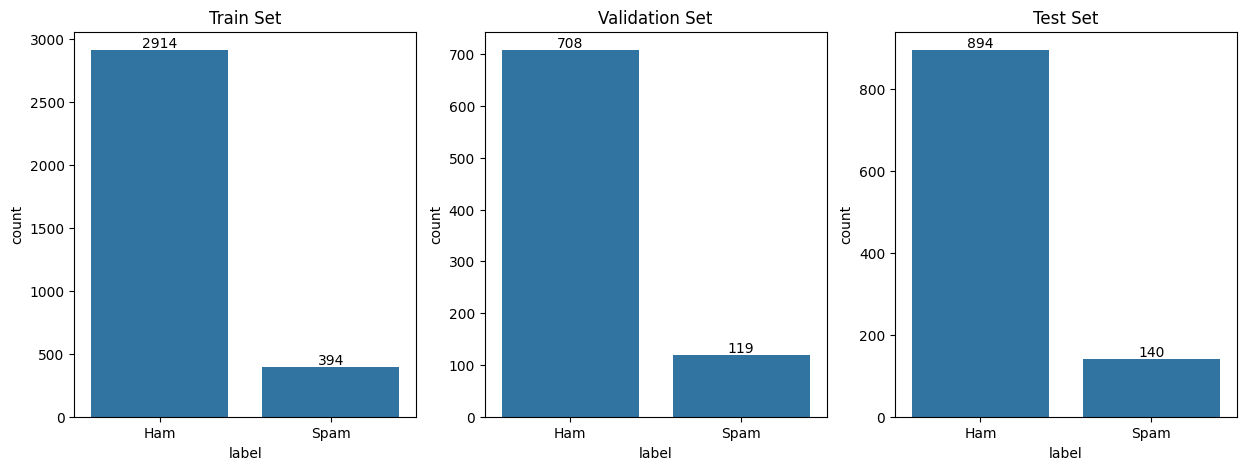

In [23]:
X_train, X_test, X_val, y_train, y_test, y_val = utils.split_train_test_valid(
    df=df,
    test_size=0.2,
    random_state=42
)
# Plot the distribution of the labels in train, validation, and test sets
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, data in enumerate([(y_train, 'Train Set'), (y_val, 'Validation Set'), (y_test, 'Test Set')]):
    utils.plot_distribution(data[0], ax[i])
    ax[i].set_xticklabels(['Ham', 'Spam'])
    ax[i].set_title(data[1])

plt.show()

In [24]:
! dvc add data
! git add data.dvc
! git commit -m "Change seed to 42"
! dvc push

⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
!
Checking out /content/data          |0.00 [00:00,    ?files/s]
Adding...: 100% 1/1 [00:00<00:00, 26.28file/s{'info': ''}]

To track the changes with git, run:

	git add data.dvc

To enable auto staging, run:

	dvc config core.autostage true
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	__pycache__/
	abiding-rhythm-452619-i1-de7f9f53f283.json
	raw_data
	sample_data/
	utils.py

no changes added to commit (use "git add" and/or "git commit -a")
Pushing
Querying remote cache:   0% 0/1 [00:00<?, ?files/s]
Query

In [25]:
! git log --oneline

96d6715 (HEAD -> master) track data
9ea17c9 track data


### Get the previous version (with seed=1)

In [ ]:
! git fetch
! git checkout HEAD data.dvc
! dvc checkout

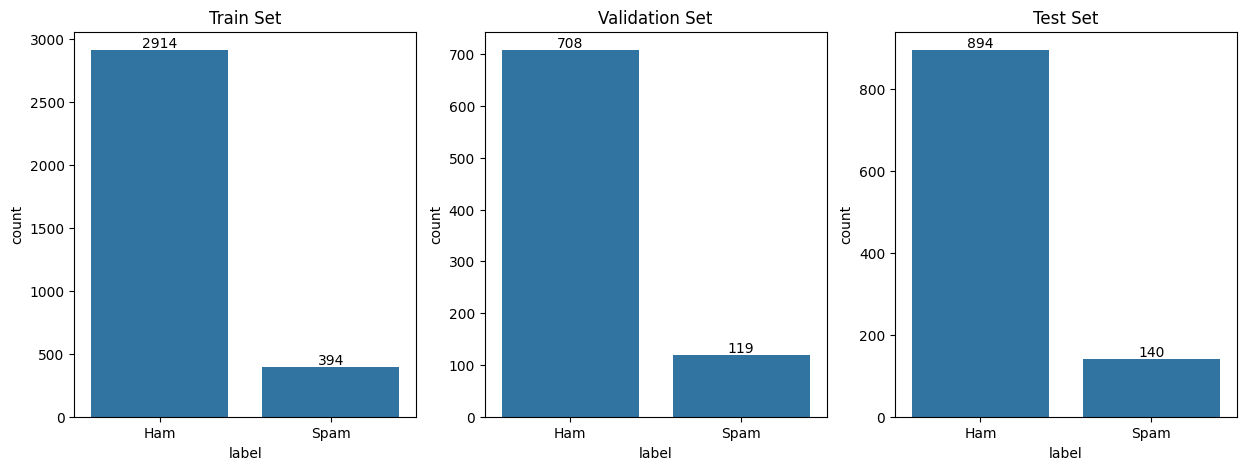

In [27]:
from sklearn.model_selection import train_test_split

X, y = df['processed_text'], df['label']
train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, train_size=0.8)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, shuffle=True, train_size=0.8)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, data in enumerate([(y_train, 'Train Set'), (y_val, 'Validation Set'), (y_test, 'Test Set')]):
    utils.plot_distribution(data[0], ax[i])
    ax[i].set_xticklabels(['Ham', 'Spam'])
    ax[i].set_title(data[1])

###Get the next version (with seed = 42)

In [ ]:
! git checkout HEAD data.dvc
! dvc checkout

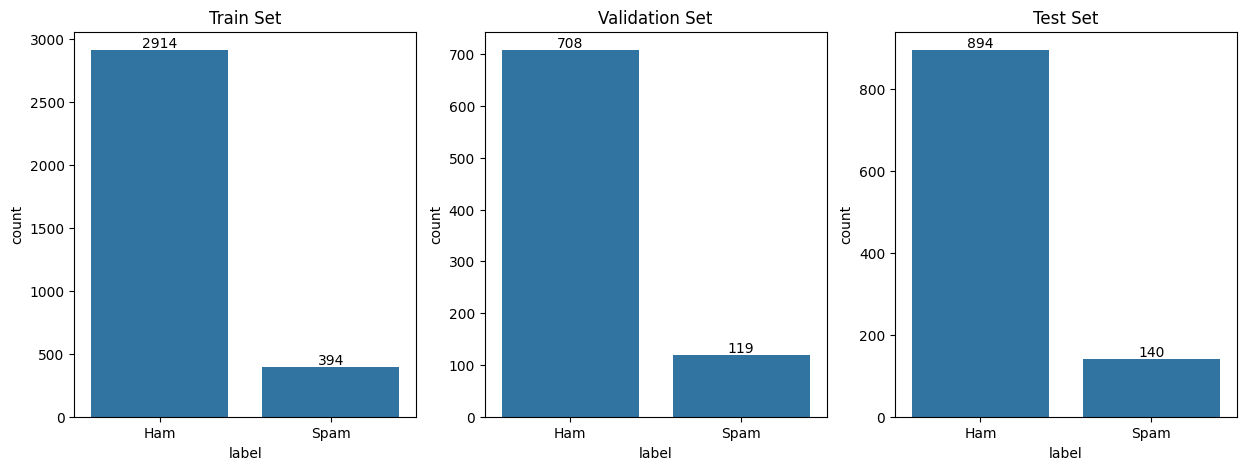

In [30]:
from sklearn.model_selection import train_test_split

X, y = df['processed_text'], df['label']
train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, train_size=0.8)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, shuffle=True, train_size=0.8)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, data in enumerate([(y_train, 'Train Set'), (y_val, 'Validation Set'), (y_test, 'Test Set')]):
    utils.plot_distribution(data[0], ax[i])
    ax[i].set_xticklabels(['Ham', 'Spam'])
    ax[i].set_title(data[1])